# ЗАНЯТИЕ 2

Цель занятия 2. Ознакомление с методом простейшего корреляционного анализа как со способом анализа и классификации цифровых
изображений. 

# 1.  
Оценить возможности простейшего корреляционного анализа
изображений для задачи классификации изображений арабских цифр
в десятичной системе счисления:

а)  подготовить набор эталонов – изображений арабских цифр в десятичной системе счисления. Размер всех изображений Nп × Nп одинаков. Значение Nп уточнить у преподавателя. Изображение представляет
собой Черный символ цифры на Белом фоне. Символ цифры должен занимать как можно большую площадь на изображении. Одна цифра
должна быть представлена одним изображением-эталоном;

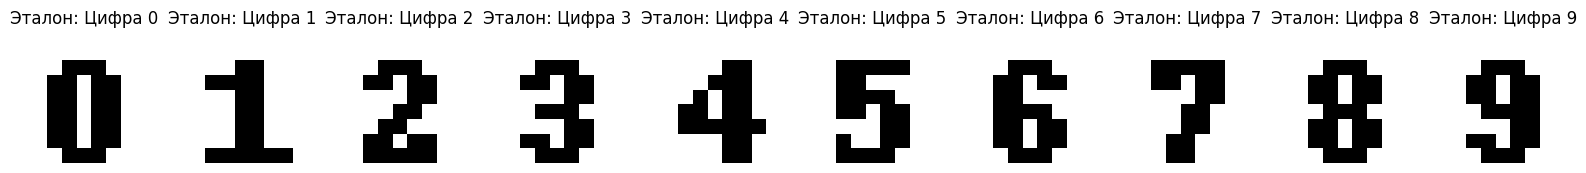

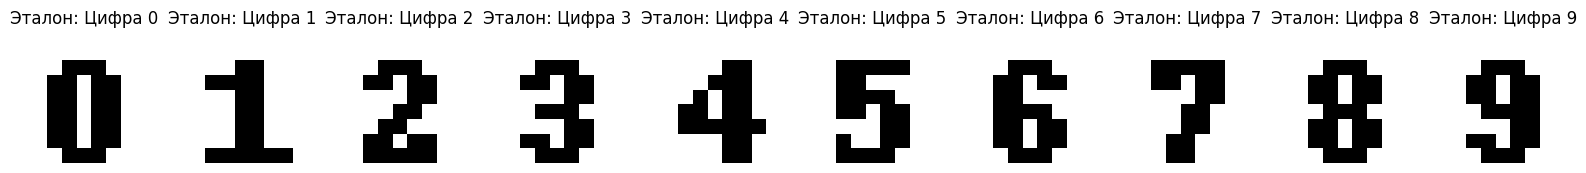

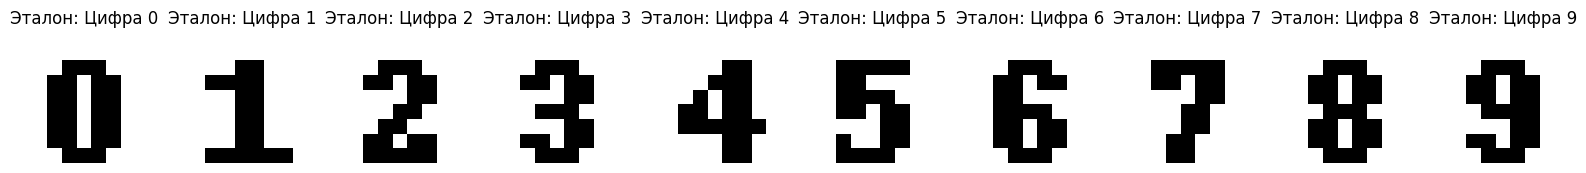

In [469]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Размер изображения
N_p = 9
digits = list(range(10))
font = ImageFont.load_default()

# Создание эталонных изображений
for digit in digits:
    img = Image.new('L', (N_p, N_p), color=255)  # Белый фон
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//20), str(digit), font=font, fill=0)  # Черный текст
    img.save(f"digit_{digit}.png")

# Вывод эталонных изображений
plt.figure(figsize=(20, 20))
for i, digit in enumerate(digits):
    plt.subplot(4, 10, i+1)
    plt.imshow(Image.open(f"digit_{digit}.png"), cmap='gray')
    plt.title(f"Эталон: Цифра {digit}")
    plt.axis('off')
plt.show()


for digit2 in digits:
    img = Image.new('L', (N_p, N_p), color=255)  # Белый фон
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//20), str(digit2), font=font, fill=0)  # Черный текст
    img.save(f"digit2_{digit2}.png")

# Вывод эталонных изображений
plt.figure(figsize=(20, 20))
for i, digit2 in enumerate(digits):
    plt.subplot(4, 10, i+1)
    plt.imshow(Image.open(f"digit2_{digit2}.png"), cmap='gray')
    plt.title(f"Эталон: Цифра {digit2}")
    plt.axis('off')
plt.show()


for digit3 in digits:
    img = Image.new('L', (N_p, N_p), color=255)  # Белый фон
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//20), str(digit3), font=font, fill=0)  # Черный текст
    img.save(f"digit3_{digit3}.png")

# Вывод эталонных изображений
plt.figure(figsize=(20, 20))
for i, digit3 in enumerate(digits):
    plt.subplot(4, 10, i+1)
    plt.imshow(Image.open(f"digit3_{digit3}.png"), cmap='gray')
    plt.title(f"Эталон: Цифра {digit3}")
    plt.axis('off')
plt.show()

б)  сформировать набор входных изображений в том же формате, что
и эталон. Количество входных изображений произвольное. Подготовить
входные изображения так, чтобы их формат и содержание могли эффективно сравниваться с эталонными. Символы должны занимать одинаковую площадь на изображении, быть одинаковым образом ориентированы
в пространстве изображения и приведены к единой цветовой шкале;

/tmp/ipykernel_4781/2676983554.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(image)


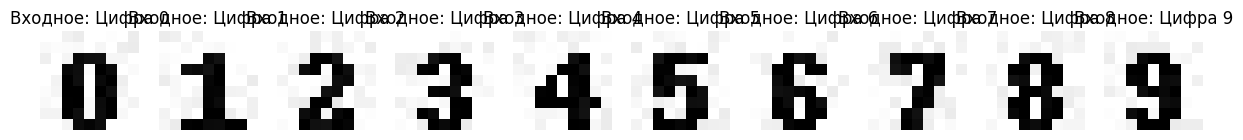

/tmp/ipykernel_4781/2676983554.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(image)


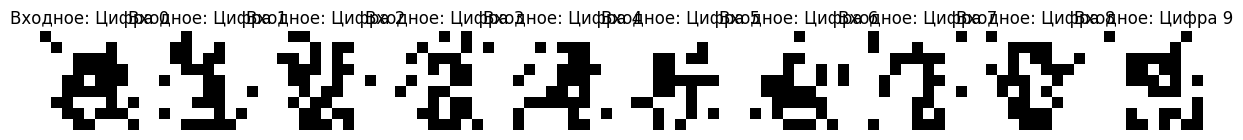

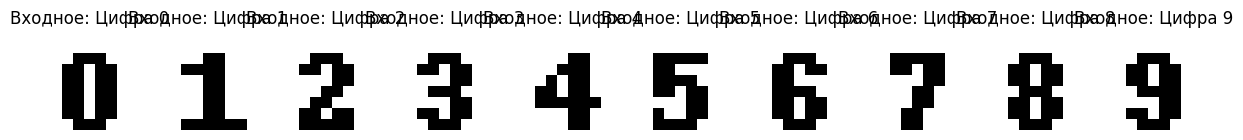

In [470]:
import random

def add_noise(image, noise_level=50):  # Увеличенный уровень шума
    img_array = np.array(image)
    noise = np.random.randint(-noise_level, noise_level, img_array.shape)
    img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(img_array.astype('uint8'))

def distort_image(image, distortion_level=20):  # Искажение цифр
    img_array = np.array(image)
    for _ in range(distortion_level):
        x = random.randint(0, N_p-1)
        y = random.randint(0, N_p-1)
        img_array[x, y] = 0 if img_array[x, y] == 255 else 255
    return Image.fromarray(img_array.astype('uint8'))

# Создание входных изображений
for i, digit in enumerate(digits):
    img = Image.open(f"digit_{digit}.png")
    if i < 10:
        img = add_noise(img, noise_level=20)  # Увеличенный шум для первых 5
  
    img.save(f"input_digit_{digit}.png")

# Вывод входных изображений
plt.figure(figsize=(15, 8))
for i, digit in enumerate(digits):
    plt.subplot(2, 10, i+1)
    plt.imshow(Image.open(f"input_digit_{digit}.png"), cmap='gray')
    plt.title(f"Входное: Цифра {digit}")
    plt.axis('off')
plt.show()


# Создание входных изображений
for i, digit2 in enumerate(digits):
    img = Image.open(f"digit2_{digit2}.png")
    if i < 10:
        img = distort_image(img)  # Искажение для последних 5
    img.save(f"input_digit2_{digit2}.png")

# Вывод входных изображений
plt.figure(figsize=(15, 8))
for i, digit2 in enumerate(digits):
    plt.subplot(2, 10, i+1)
    plt.imshow(Image.open(f"input_digit2_{digit2}.png"), cmap='gray')
    plt.title(f"Входное: Цифра {digit2}")
    plt.axis('off')
plt.show()


# Создание входных изображений
#for i, digit3 in enumerate(digits):
   # img = Image.open(f"digit3_{digit3}.png")
 
   # img.save(f"input_digit3_{digit3}.png")

# Вывод входных изображений
plt.figure(figsize=(15, 8))
for i, digit3 in enumerate(digits):
    plt.subplot(2, 10, i+1)
    plt.imshow(Image.open(f"input_digit3_{digit3}.png"), cmap='gray')
    plt.title(f"Входное: Цифра {digit3}")
    plt.axis('off')
plt.show()



в)  ознакомиться с различиями в представлениях цифровых изображений в виде массивов данных для различных форматов («*.jpg», «*.tif»
и др.); 

# Формат *.png предпочтителен для анализа, так как он не теряет качество изображения при сохранении.

г)  рассчитать коэффициенты взаимной корреляции каждого из
входных изображений с каждым из изображений-эталонов. Расчеты
проводить только для яркостных составляющих изображений; 

In [471]:
from scipy.stats import pearsonr

def calculate_pearson_correlation(img1, img2):
    img1_array = np.array(img1).flatten().astype(float)
    img2_array = np.array(img2).flatten().astype(float)
    corr, _ = pearsonr(img1_array, img2_array)
    return corr

# Расчет корреляции для каждого входного изображения
correlation_results = {}
correlation_results2 = {}
correlation_results3 = {}
digits = range(10)  # Список цифр от 0 до 9

for digit in digits:
    input_img = Image.open(f"input_digit_{digit}.png")
    correlations = []
    for ref_digit in digits:
        reference_img = Image.open(f"digit_{ref_digit}.png")
        corr = calculate_pearson_correlation(input_img, reference_img)
        correlations.append((ref_digit, corr))
    correlation_results[digit] = correlations

# Вывод значений взаимной корреляции
for digit in digits:
    print(f"Взаимная корреляция для входного изображения цифры {digit}:")
    for ref_digit, corr in correlation_results[digit]:
        print(f"  С эталонной цифрой с шумом {ref_digit}: {corr:.4f}")
    print()

for digit2 in digits:
    input_img2 = Image.open(f"input_digit2_{digit2}.png")
    correlations2 = []
    for ref_digit2 in digits:
        reference_img2 = Image.open(f"digit2_{ref_digit2}.png")
        corr2 = calculate_pearson_correlation(input_img2, reference_img2)
        correlations2.append((ref_digit2, corr2))
    correlation_results2[digit2] = correlations2

# Вывод значений взаимной корреляции
for digit2 in digits:
    print(f"Взаимная корреляция для входного изображения цифры {digit2}:")
    for ref_digit2, corr2 in correlation_results2[digit2]:
        print(f"  С эталонной цифрой с искажением {ref_digit2}: {corr2:.4f}")
    print()


for digit3 in digits:
    input_img3 = Image.open(f"input_digit3_{digit3}.png")
    correlations3 = []
    for ref_digit3 in digits:
        reference_img3 = Image.open(f"digit3_{ref_digit3}.png")
        corr3 = calculate_pearson_correlation(input_img3, reference_img3)
        correlations3.append((ref_digit3, corr3))
    correlation_results3[digit3] = correlations3

# Вывод значений взаимной корреляции
for digit3 in digits:
    print(f"Взаимная корреляция для входного изображения цифры {digit3}:")
    for ref_digit3, corr3 in correlation_results3[digit3]:
        print(f"  С эталонной цифрой чистые{ref_digit3}: {corr3:.4f}")
    print()

Взаимная корреляция для входного изображения цифры 0:
  С эталонной цифрой с шумом 0: 0.9985
  С эталонной цифрой с шумом 1: 0.3291
  С эталонной цифрой с шумом 2: 0.6446
  С эталонной цифрой с шумом 3: 0.7949
  С эталонной цифрой с шумом 4: 0.5915
  С эталонной цифрой с шумом 5: 0.7093
  С эталонной цифрой с шумом 6: 0.8840
  С эталонной цифрой с шумом 7: 0.4863
  С эталонной цифрой с шумом 8: 0.9121
  С эталонной цифрой с шумом 9: 0.8788

Взаимная корреляция для входного изображения цифры 1:
  С эталонной цифрой с шумом 0: 0.3399
  С эталонной цифрой с шумом 1: 0.9982
  С эталонной цифрой с шумом 2: 0.6186
  С эталонной цифрой с шумом 3: 0.5058
  С эталонной цифрой с шумом 4: 0.2932
  С эталонной цифрой с шумом 5: 0.4375
  С эталонной цифрой с шумом 6: 0.3767
  С эталонной цифрой с шумом 7: 0.5507
  С эталонной цифрой с шумом 8: 0.4205
  С эталонной цифрой с шумом 9: 0.4385

Взаимная корреляция для входного изображения цифры 2:
  С эталонной цифрой с шумом 0: 0.6474
  С эталонной циф

/tmp/ipykernel_4781/852115049.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img1_array = np.array(img1).flatten().astype(float)
/tmp/ipykernel_4781/852115049.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img2_array = np.array(img2).flatten().astype(float)


д)  выбрать и вывести на экран три класса, которые наиболее соответствуют входному изображению; 

Коэффициенты корреляции для входного изображения цифры 0:
  Цифра 0: 0.9985
  Цифра 8: 0.9121
  Цифра 6: 0.8840

Коэффициенты корреляции для входного изображения цифры 1:
  Цифра 1: 0.9982
  Цифра 2: 0.6186
  Цифра 7: 0.5507

Коэффициенты корреляции для входного изображения цифры 2:
  Цифра 2: 0.9980
  Цифра 3: 0.7733
  Цифра 8: 0.7309

Коэффициенты корреляции для входного изображения цифры 3:
  Цифра 3: 0.9983
  Цифра 9: 0.9085
  Цифра 8: 0.8835

Коэффициенты корреляции для входного изображения цифры 4:
  Цифра 4: 0.9984
  Цифра 0: 0.5808
  Цифра 8: 0.4806

Коэффициенты корреляции для входного изображения цифры 5:
  Цифра 5: 0.9980
  Цифра 0: 0.7131
  Цифра 9: 0.7061

Коэффициенты корреляции для входного изображения цифры 6:
  Цифра 6: 0.9984
  Цифра 8: 0.9152
  Цифра 0: 0.8852

Коэффициенты корреляции для входного изображения цифры 7:
  Цифра 7: 0.9973
  Цифра 3: 0.6741
  Цифра 2: 0.6485

Коэффициенты корреляции для входного изображения цифры 8:
  Цифра 8: 0.9985
  Цифра 0: 0.9123
  

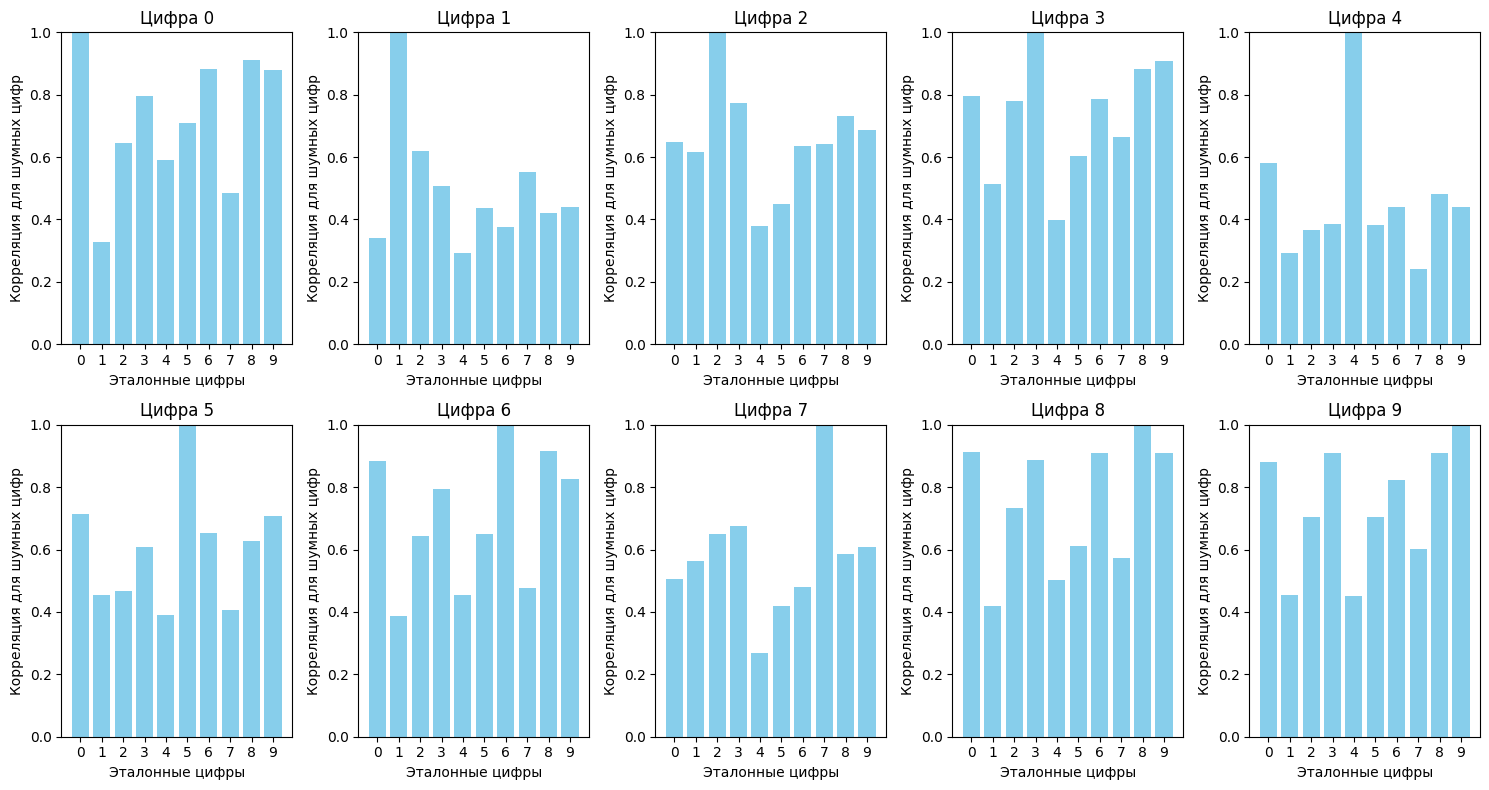

Коэффициенты корреляции для входного изображения цифры 0:
  Цифра 9: 0.5986
  Цифра 0: 0.5940
  Цифра 8: 0.5690

Коэффициенты корреляции для входного изображения цифры 1:
  Цифра 1: 0.6072
  Цифра 2: 0.4316
  Цифра 7: 0.3328

Коэффициенты корреляции для входного изображения цифры 2:
  Цифра 2: 0.5853
  Цифра 6: 0.4158
  Цифра 8: 0.3894

Коэффициенты корреляции для входного изображения цифры 3:
  Цифра 3: 0.6747
  Цифра 8: 0.6160
  Цифра 9: 0.5869

Коэффициенты корреляции для входного изображения цифры 4:
  Цифра 4: 0.5088
  Цифра 1: 0.2130
  Цифра 8: 0.2070

Коэффициенты корреляции для входного изображения цифры 5:
  Цифра 5: 0.6447
  Цифра 0: 0.4225
  Цифра 9: 0.4079

Коэффициенты корреляции для входного изображения цифры 6:
  Цифра 6: 0.6085
  Цифра 8: 0.5821
  Цифра 0: 0.5567

Коэффициенты корреляции для входного изображения цифры 7:
  Цифра 7: 0.5132
  Цифра 2: 0.3731
  Цифра 1: 0.3612

Коэффициенты корреляции для входного изображения цифры 8:
  Цифра 8: 0.5186
  Цифра 0: 0.4923
  

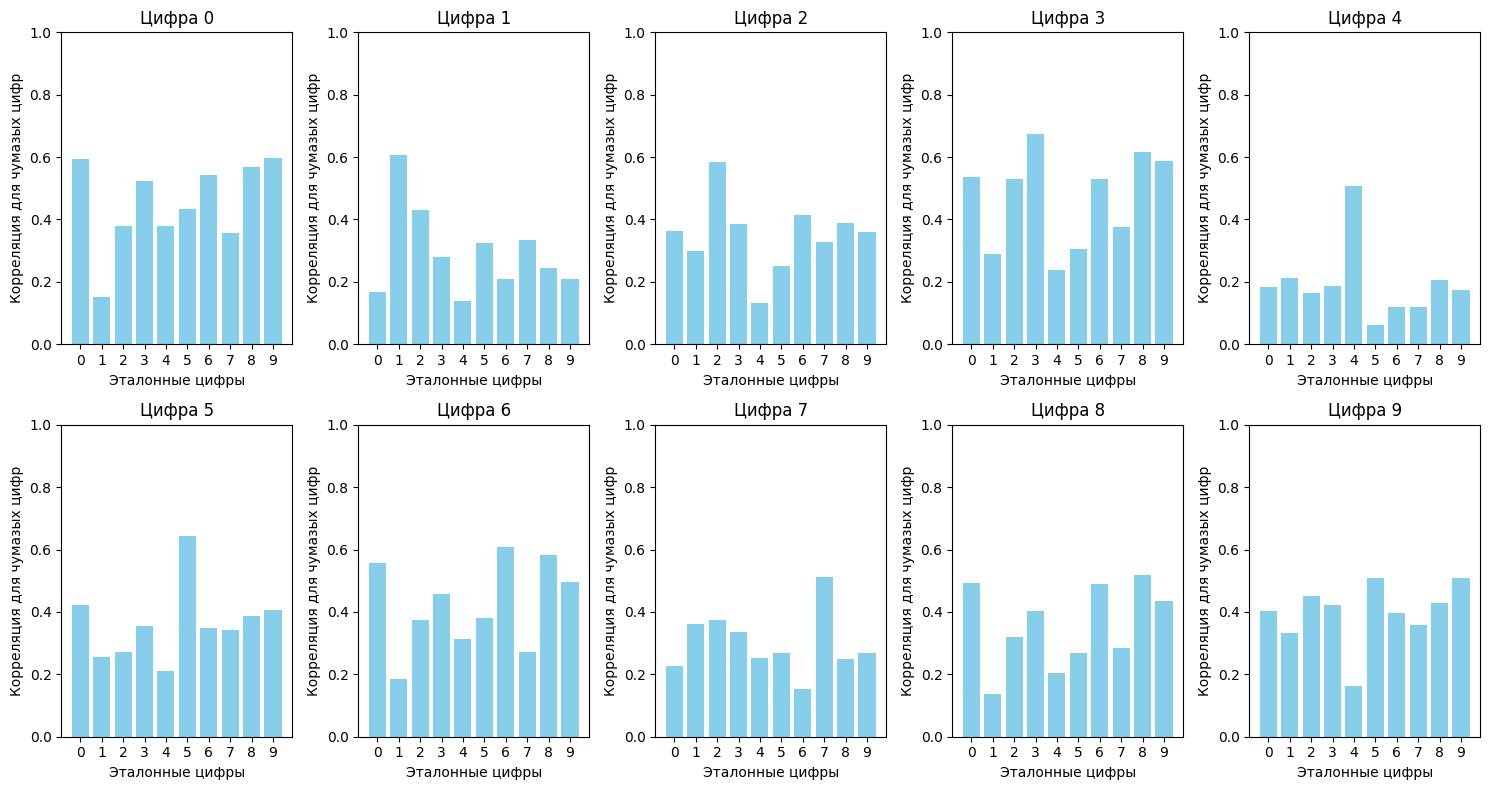

Коэффициенты корреляции для входного изображения цифры 0:
  Цифра 0: 1.0000
  Цифра 8: 0.9145
  Цифра 6: 0.8859

Коэффициенты корреляции для входного изображения цифры 1:
  Цифра 1: 1.0000
  Цифра 2: 0.6159
  Цифра 7: 0.5614

Коэффициенты корреляции для входного изображения цифры 2:
  Цифра 2: 1.0000
  Цифра 3: 0.7788
  Цифра 8: 0.7337

Коэффициенты корреляции для входного изображения цифры 3:
  Цифра 3: 1.0000
  Цифра 9: 0.9117
  Цифра 8: 0.8854

Коэффициенты корреляции для входного изображения цифры 4:
  Цифра 4: 1.0000
  Цифра 0: 0.5909
  Цифра 8: 0.4933

Коэффициенты корреляции для входного изображения цифры 5:
  Цифра 5: 1.0000
  Цифра 0: 0.7121
  Цифра 9: 0.7039

Коэффициенты корреляции для входного изображения цифры 6:
  Цифра 6: 1.0000
  Цифра 8: 0.9126
  Цифра 0: 0.8859

Коэффициенты корреляции для входного изображения цифры 7:
  Цифра 7: 1.0000
  Цифра 3: 0.6698
  Цифра 2: 0.6445

Коэффициенты корреляции для входного изображения цифры 8:
  Цифра 8: 1.0000
  Цифра 0: 0.9145
  

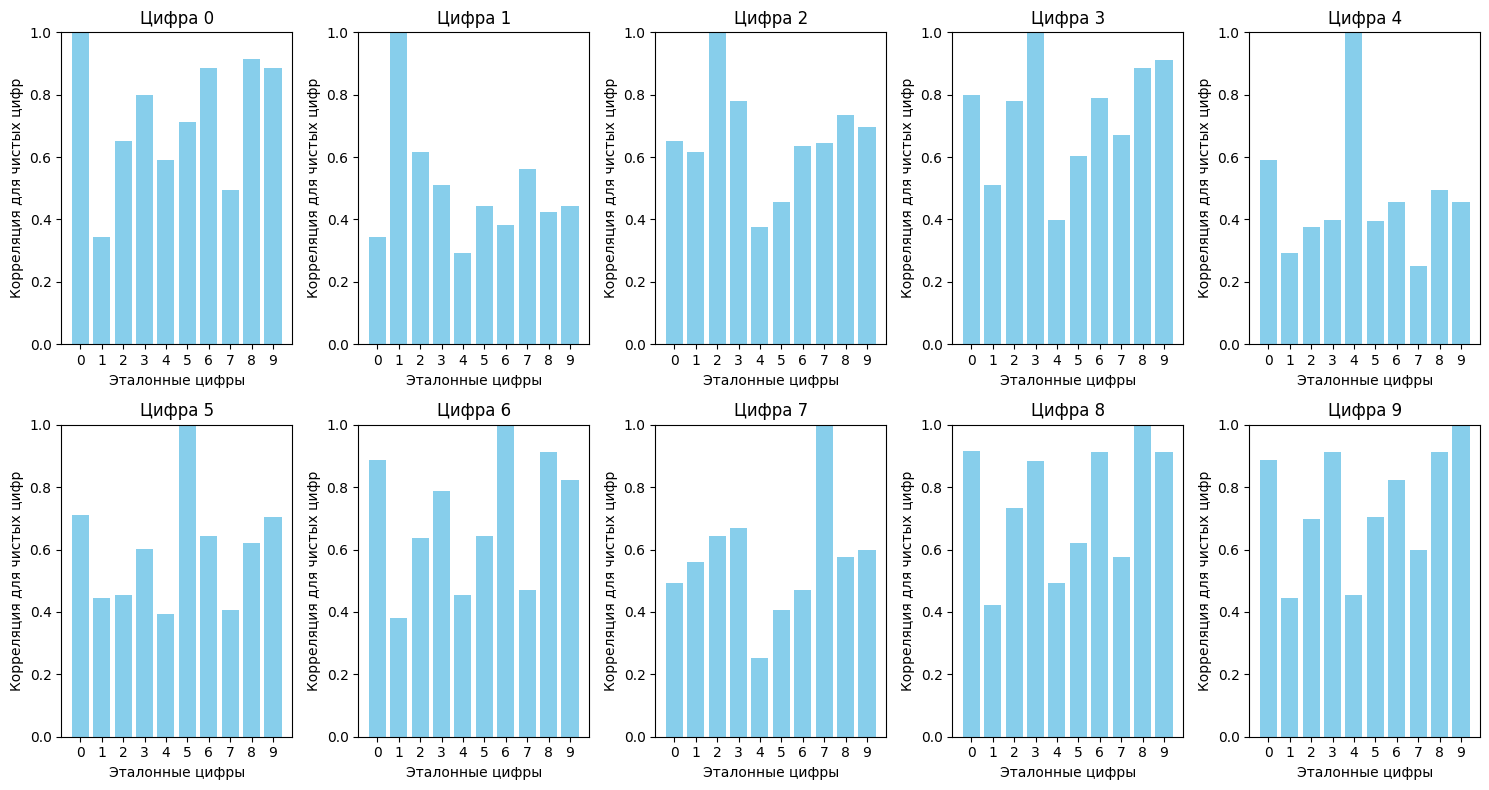

In [472]:
for digit in digits:
    print(f"Коэффициенты корреляции для входного изображения цифры {digit}:")
    correlations = correlation_results[digit]
    correlations.sort(key=lambda x: x[1], reverse=True)  # Сортировка для вывода
    for ref_digit, corr in correlations[:3]:
        print(f"  Цифра {ref_digit}: {corr:.4f}")
    print()

# Визуализация коэффициентов корреляции
plt.figure(figsize=(15, 8))
for i, digit in enumerate(digits):
    plt.subplot(2, 5, i+1)
    # Создаем список корреляций для всех цифр (от 0 до 9)
    correlations_all = [0] * 10  # Инициализируем нулями
    for ref_digit, corr in correlation_results[digit]:
        correlations_all[ref_digit] = corr  # Заполняем значения корреляций
    plt.bar(range(10), correlations_all, color='skyblue')
    plt.title(f"Цифра {digit}")
    plt.xlabel("Эталонные цифры")
    plt.ylabel("Корреляция для шумных цифр")
    plt.xticks(range(10))  # Размечение оси X от 0 до 9 с шагом 1
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()





for digit2 in digits:
    print(f"Коэффициенты корреляции для входного изображения цифры {digit2}:")
    correlations2 = correlation_results2[digit2]
    correlations2.sort(key=lambda x: x[1], reverse=True)  # Сортировка для вывода
    for ref_digit2, corr2 in correlations2[:3]:
        print(f"  Цифра {ref_digit2}: {corr2:.4f}")
    print()

# Визуализация коэффициентов корреляции
plt.figure(figsize=(15, 8))
for i, digit2 in enumerate(digits):
    plt.subplot(2, 5, i+1)
    # Создаем список корреляций для всех цифр (от 0 до 9)
    correlations2_all = [0] * 10  # Инициализируем нулями
    for ref_digit2, corr2 in correlation_results2[digit2]:
        correlations2_all[ref_digit2] = corr2  # Заполняем значения корреляций
    plt.bar(range(10), correlations2_all, color='skyblue')
    plt.title(f"Цифра {digit2}")
    plt.xlabel("Эталонные цифры")
    plt.ylabel("Корреляция для чумазых цифр")
    plt.xticks(range(10))  # Размечение оси X от 0 до 9 с шагом 1
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()


for digit3 in digits:
    print(f"Коэффициенты корреляции для входного изображения цифры {digit3}:")
    correlations3 = correlation_results3[digit3]
    correlations3.sort(key=lambda x: x[1], reverse=True)  # Сортировка для вывода
    for ref_digit3, corr3 in correlations3[:3]:
        print(f"  Цифра {ref_digit3}: {corr3:.4f}")
    print()

# Визуализация коэффициентов корреляции
plt.figure(figsize=(15, 8))
for i, digit3 in enumerate(digits):
    plt.subplot(2, 5, i+1)
    # Создаем список корреляций для всех цифр (от 0 до 9)
    correlations3_all = [0] * 10  # Инициализируем нулями
    for ref_digit3, corr3 in correlation_results3[digit3]:
        correlations3_all[ref_digit3] = corr3  # Заполняем значения корреляций
    plt.bar(range(10), correlations3_all, color='skyblue')
    plt.title(f"Цифра {digit3}")
    plt.xlabel("Эталонные цифры")
    plt.ylabel("Корреляция для чистых цифр")
    plt.xticks(range(10))  # Размечение оси X от 0 до 9 с шагом 1
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

е)  сделать вывод о статистической значимости полученных значений коэффициентов взаимной корреляции, о недостатках реализованного метода классификации изображений.

Корреляционный анализ прост в реализации, но имеет недостатки:

Чувствителен к шуму и искажениям.
Не учитывает сложные особенности изображений.
Может быть недостаточно точным для сложных задач классификации.

# 2.  
Применить МНК или ансамблевые методы для повышения точности анализа и классификации изображений:

а)  расширить набор эталонов и входных изображений, соответствующих произвольно выбранному классу – цифре с 1 до нескольких изображений (рекомендуется больше 10). Выполнить последующие шаги б)
или в) в зависимости от выбранного метода;

Создадим больше эталонных и входных изображений для одной цифры (например, цифры 5).

/tmp/ipykernel_4781/2676983554.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(image)


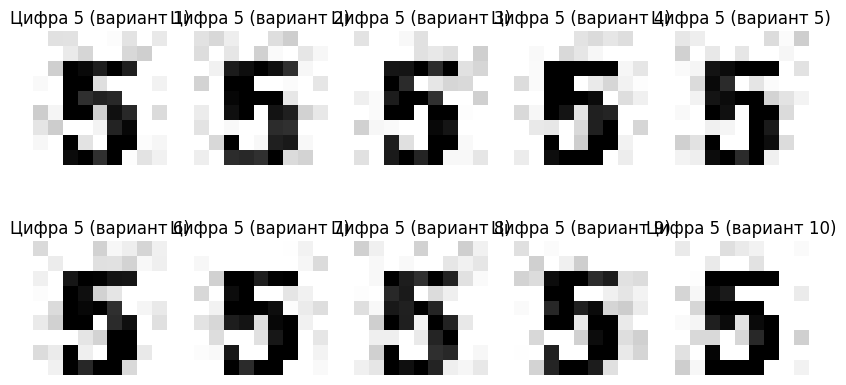

In [473]:
for i in range(10):
    img = Image.new('L', (N_p, N_p), color=255)
    draw = ImageDraw.Draw(img)
    draw.text((N_p//4, N_p//10), '5', font=font, fill=0)
    img = add_noise(img)
    img.save(f"input_digit_5_{i}.png")

# Вывод входных изображений
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Image.open(f"input_digit_5_{i}.png"), cmap='gray')
    plt.title(f"Цифра 5 (вариант {i+1})")
    plt.axis('off')
plt.show()


б)  применить метод МНК для построения регрессионной модели,
соответствующей выбранному классу по выборке эталонов. Допускается преобразование изображений из двумерного в одномерный формат; 

In [474]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def add_noise(image, noise_level=50):
    img_array = np.array(image)
    noise = np.random.randint(-noise_level, noise_level, img_array.shape)
    img_array = np.clip(img_array + noise, 0, 255)
    return Image.fromarray(img_array.astype('uint8'))

N_p = 16
font = ImageFont.load_default()
digits = [5, 2]  # Добавляем второй класс для вариативности

for digit in digits:
    for i in range(5):  # По 5 примеров каждого класса
        img = Image.new('L', (N_p, N_p), color=255)
        draw = ImageDraw.Draw(img)
        draw.text((N_p//4, N_p//4), str(digit), font=font, fill=0)
        img = add_noise(img)
        img.save(f"input_digit_{digit}_{i}.png")

X = []
y = []
for digit in digits:
    for i in range(5):
        img = Image.open(f"input_digit_{digit}_{i}.png")
        img_array = np.array(img).flatten()
        X.append(img_array)
        y.append(digit)

X = np.array(X)
y = np.array(y)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Линейная регрессия
print("\nЛинейная регрессия:")
lin_model = LinearRegression()
lin_model.fit(X_scaled, y)
lin_predictions = lin_model.predict(X_scaled)

lin_predictions_rounded = np.round(lin_predictions).astype(int)
lin_predictions_rounded = np.clip(lin_predictions_rounded, 1, 9)  # Ограничиваем значения

print(f"Истинные метки: {y}")
print(f"Предсказания: {lin_predictions_rounded}")

# Проверка вариативности
if len(np.unique(lin_predictions_rounded)) > 1:
    corr, p_value = pearsonr(lin_predictions_rounded, y)
    print(f"Корреляция: {corr:.3f}")
else:
    print("Не удалось вычислить корреляцию - все предсказания одинаковые")



Линейная регрессия:
Истинные метки: [5 5 5 5 5 2 2 2 2 2]
Предсказания: [5 5 5 5 5 2 2 2 2 2]
Корреляция: 1.000


/tmp/ipykernel_4781/3855134753.py:5: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(image)
/tmp/ipykernel_4781/3855134753.py:27: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_array = np.array(img).flatten()


в)  применить любой из доступных ансамблевых методов для улучшения показателей модели, полученной в пункте 1; 


Используем метод случайного леса для улучшения классификации.

In [475]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)
rf_predictions = rf_model.predict(X_scaled)

print(f"Истинные метки: {y}")
print(f"Предсказания: {rf_predictions}")

if len(np.unique(rf_predictions)) > 1:
    corr, p_value = pearsonr(rf_predictions, y)
    print(f"Корреляция: {corr:.3f}")
else:
    print("Не удалось вычислить корреляцию - все предсказания одинаковые")

Истинные метки: [5 5 5 5 5 2 2 2 2 2]
Предсказания: [5 5 5 5 5 2 2 2 2 2]
Корреляция: 1.000


г)  оценить основные показатели качества МНК или ансамблевого
метода. Сделать вывод о возможности применения МНК или ансамблевых методов в задачах анализа и классификации изображений

1)МНК подходит для простых задач, но не учитывает сложные зависимости.
2)Ансамблевые методы (например, случайный лес) более устойчивы к шуму и могут улучшить точность классификации.


Вывод: Для повышения точности классификации лучше использовать ансамблевые методы, такие как случайный лес.